# Interpolation

The metocean datasets for velocity are on regular, uniform grids. We need to be able to estimate the velocity at sub-grid scale.  This notebooks explores making that estimate using interpolation.

[Wikipedia: Interpolation](https://en.wikipedia.org/wiki/Interpolation)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Interpolation_example_linear.svg/512px-Interpolation_example_linear.svg.png"/>

Since this is critical aspect of our project, this notebook explores difference approaches to interpolation and provides examples for related test cases.

## Scipy.interpolate

In [16]:
import scipy.interpolate as interp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Suppose we have the data:

In [20]:
x = [0, 1, 2, 3, 4, 5, 6]
y = [0, .8, .9, .2, -.7, -.9, -.3]

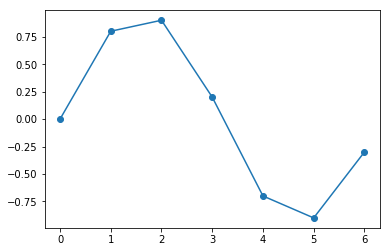

In [21]:
plt.plot(x, y, 'o-')

# Create Test Data

In [2]:
X = np.asarray([x for x in range(0,10)])
Y = X
T = X

In [3]:
data2D = np.asarray([[ y for y in range(Y.size)] for x in range(X.size)])
data3D = np.asarray([[[ t for t in range(T.size)] \
                     for y in range(Y.size)] for x in range(X.size)])

In [4]:
data2D

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [5]:
data3D[:2, :2, :2]

array([[[0, 1],
        [0, 1]],

       [[0, 1],
        [0, 1]]])

# Create Test Case

In [6]:
x_pt = 1.5
y_pt = 1.5
t_pt = 1.5

# Regular Grid Interpolator

In [7]:
data2D_interp = interp.RegularGridInterpolator((Y, X), data2D)
data3D_interp = interp.RegularGridInterpolator((T, Y, X), data3D)

In [8]:
print(data2D_interp([y_pt, x_pt])[0])
print(data3D_interp([t_pt, y_pt, x_pt])[0])

1.5
1.5


# Homemade Interpolator

In [9]:
def linear_interpolator(data, dt_idx, dy_idx, dx_idx, t_idx0, y_idx0, x_idx0):
    
    A = data[t_idx0:t_idx0+2, y_idx0:y_idx0+2, x_idx0:x_idx0+2]
    B = dt_idx*A[0, :, :] + (1-dt_idx)*A[1, :, :]
    C = dy_idx*B[0, :] + (1-dy_idx)*B[1, :]
    D = dx_idx*C[0] + (1-dx_idx)*C[1]
    
    return D

In [10]:
def get_interpolated_value(data, t0, dt, y0, dy, x0, dx, t_pt, y_pt, x_pt):

    t_idx = (t_pt - t0)/dt
    y_idx = (y_pt - y0)/dy
    x_idx = (x_pt - x0)/dx
    
    (t_idx0, dt_idx), (y_idx0, dy_idx), (x_idx0, dx_idx) = [(int(np.floor(x)), \
                                    x - np.floor(x)) for x in [t_idx, y_idx, x_idx]]
    
    u = linear_interpolator(data, dt_idx, dy_idx, dx_idx, t_idx0, y_idx0, x_idx0)
       
    return u 

In [11]:
x0 = X[0]
dx = np.diff(X).mean()
y0 = Y[0]
dy = np.diff(Y).mean()
t0 = T[0]
dt = np.diff(T).mean()

In [12]:
get_interpolated_value(data3D, t0, dt, y0, dy, x0, dx, t_pt, y_pt, x_pt)

1.5